## Lab 7 - Clustering Lab

In [53]:
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn.datasets as datasets

from seaborn import plt, color_palette
from sklearn.preprocessing import scale

In [54]:
# create synthetic east-to cluster data
X, Y = datasets.make_blobs(centers=4, cluster_std=0.5, random_state=1)
# x is the feature data
# y is the cluster x belongs to

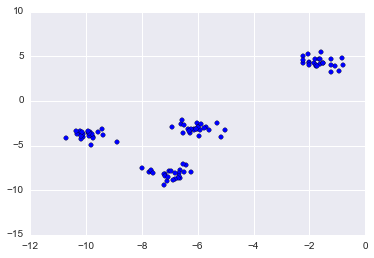

In [55]:
plt.scatter(X[:,0], X[:,1]);

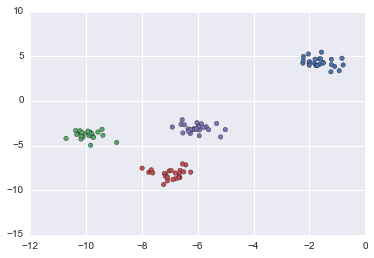

In [56]:
c = [color_palette()[i] for i in Y] # make each cluster (ie value in Y) a different color

plt.scatter(X[:,0], X[:,1], c=c)

In [57]:
# compute distance matrix
from scipy.spatial.distance import pdist, squareform

# not printed as pretty, but the values are correct
distx = squareform(pdist(X, metric='euclidean'))
distx

array([[ 0.        ,  4.07351377,  1.38489752, ...,  4.20935219,
         4.83513775,  5.09018246],
       [ 4.07351377,  0.        ,  5.09606694, ...,  3.60582807,
         0.77397149,  3.88578556],
       [ 1.38489752,  5.09606694,  0.        , ...,  4.19184808,
         5.81665145,  5.10360012],
       ..., 
       [ 4.20935219,  3.60582807,  4.19184808, ...,  0.        ,
         3.85038289,  0.91236854],
       [ 4.83513775,  0.77397149,  5.81665145, ...,  3.85038289,
         0.        ,  3.95349833],
       [ 5.09018246,  3.88578556,  5.10360012, ...,  0.91236854,
         3.95349833,  0.        ]])

### Hierarchical Clustering

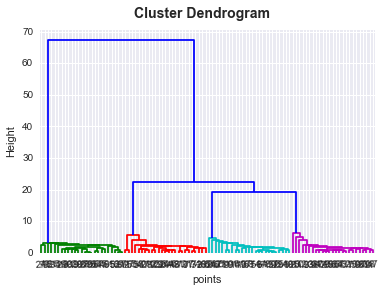

In [58]:
# perform clustering and plot the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

R = dendrogram(linkage(distx, method='single'), color_threshold=10) # setting color threshold determines what is considered a 'jump'

plt.xlabel('points')
plt.ylabel('Height')
plt.suptitle('Cluster Dendrogram', fontweight='bold', fontsize=14);

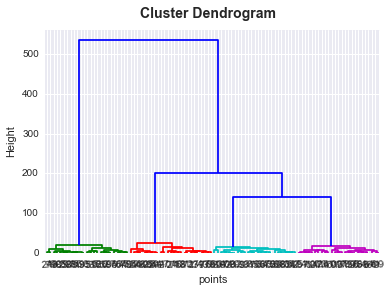

In [59]:
R = dendrogram(linkage(distx, method='ward'), color_threshold=100)

plt.xlabel('points')
plt.ylabel('Height')
plt.suptitle('Cluster Dendrogram', fontweight='bold', fontsize=14);

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
hierarch = AgglomerativeClustering(n_clusters=4, linkage='ward')

In [62]:
Y_hat_hier = hierarch.fit(X).labels_

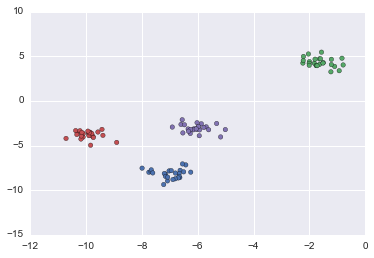

In [63]:
c_hat = [color_palette()[i] for i in Y_hat_hier]
plt.scatter(X[:,0], X[:,1], c=c_hat);

### K-means clustering

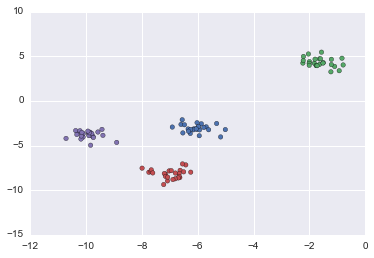

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(4, random_state=1)
Y_hat_kmeans = kmeans.fit(X).labels_

c_hat = [color_palette()[i] for i in Y_hat_kmeans]

plt.scatter(X[:,0], X[:,1], c=c_hat);

[[-6.03878328 -3.07717032]
 [-1.61042978  4.31273712]
 [-7.00367521 -8.15564814]
 [-9.93193834 -3.80607436]]


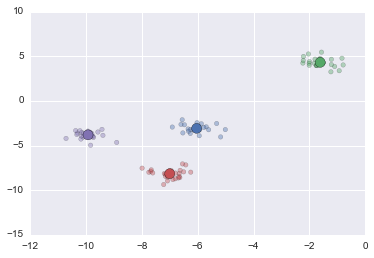

In [65]:
plt.scatter(X[:,0], X[:,1], c=c_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=[color_palette()[i] for i in np.unique(Y_hat_kmeans)])
print mu


#### Follow the steps below to:
+ Read samsungData.csv and drop Unnamed: 0 from the data set.
+ Load data for subject 1
+ Plot the first two variables to see how they relate to the six activities provided.

In [66]:
sdata = pd.read_csv('/Users/AprilSong/Desktop/data science/DAT_SF_12/data/samsungData.csv')
sdata.head()

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,standing
1,2,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,standing
2,3,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,standing
3,4,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,standing
4,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,standing


In [67]:
del sdata['Unnamed: 0']
sdata.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,standing
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,standing
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,standing
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,standing
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,standing


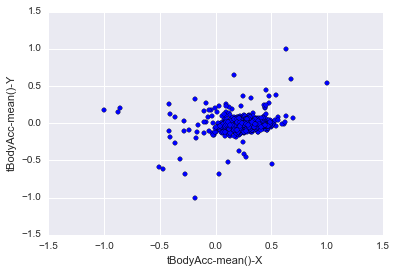

In [68]:
plt.scatter(sdata['tBodyAcc-mean()-X'], sdata['tBodyAcc-mean()-Y'])
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')

In [69]:
sdata.columns[:12]

Index([u'tBodyAcc-mean()-X', u'tBodyAcc-mean()-Y', u'tBodyAcc-mean()-Z', u'tBodyAcc-std()-X', u'tBodyAcc-std()-Y', u'tBodyAcc-std()-Z', u'tBodyAcc-mad()-X', u'tBodyAcc-mad()-Y', u'tBodyAcc-mad()-Z', u'tBodyAcc-max()-X', u'tBodyAcc-max()-Y', u'tBodyAcc-max()-Z'], dtype='object')

In [70]:
sdata['activity'].value_counts()

laying      1407
standing    1374
sitting     1286
walk        1226
walkup      1073
walkdown     986
dtype: int64

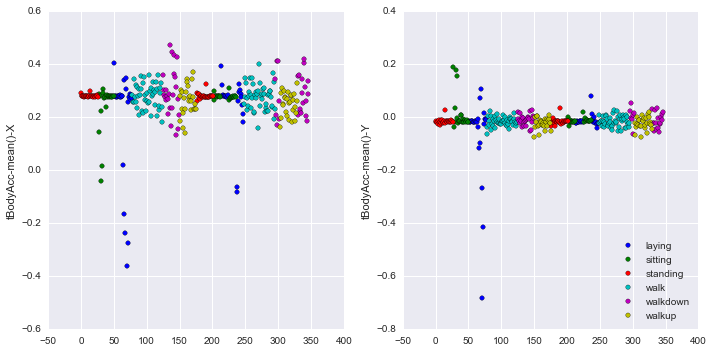

In [71]:
subj1 = sdata[sdata['subject']==1]

numericActivity = subj1.groupby('activity')
cols = {'laying' : 'b',
        'sitting' : 'g',
        'standing' : 'r',
        'walk' : 'c',
        'walkdown' : 'm',
        'walkup' : 'y'}
        
        
f, (ax1, ax2) = plt.subplots(ncols=2)
f.set_size_inches(10, 5)

for act, df in numericActivity:
    ax1.scatter(df.index, df.ix[:,0], c=cols[act], label=act)
    ax2.scatter(df.index, df.ix[:,1], c=cols[act], label=act)

ax1.set_ylabel(sdata.columns[0])
ax2.set_ylabel(sdata.columns[1])
ax2.legend(loc='lower right')

f.tight_layout();

#### Try hierarchical clustering on the first three variables and compare that to the activities.

In [73]:
subset1 = sdata.ix[:, :3]
subset1

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
0,0.288585,-0.020294,-0.132905
1,0.278419,-0.016411,-0.123520
2,0.279653,-0.019467,-0.113462
3,0.279174,-0.026201,-0.123283
4,0.276629,-0.016570,-0.115362
5,0.277199,-0.010098,-0.105137
6,0.279454,-0.019641,-0.110022
7,0.277432,-0.030488,-0.125360
8,0.277293,-0.021751,-0.120751
9,0.280586,-0.009960,-0.106065


In [74]:
distMatrix = squareform(pdist(subj1.ix[:, :3], metric='euclidean'))
distMatrix

array([[ 0.        ,  0.01437013,  0.02141267, ...,  0.14131609,
         0.07769284,  0.0479168 ],
       [ 0.01437013,  0.        ,  0.01058487, ...,  0.12730961,
         0.07723174,  0.05225461],
       [ 0.02141267,  0.01058487,  0.        , ...,  0.12173073,
         0.07232266,  0.06183539],
       ..., 
       [ 0.14131609,  0.12730961,  0.12173073, ...,  0.        ,
         0.15791714,  0.16422272],
       [ 0.07769284,  0.07723174,  0.07232266, ...,  0.15791714,
         0.        ,  0.09701442],
       [ 0.0479168 ,  0.05225461,  0.06183539, ...,  0.16422272,
         0.09701442,  0.        ]])

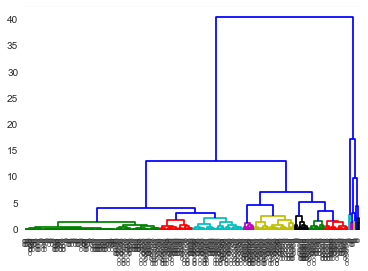

In [93]:
#plt.scatter(subset[:,0],subset[:,1])
actlabels = pd.Categorical.from_array(subj1['activity'])
R1 = dendrogram(linkage(distMatrix, method='ward'), color_threshold=3, leaf_label_func=lambda x: 'O' * (actlabels.codes[x] + 1),
           leaf_font_size=6)

In [76]:
# Let's see if variable number 9 and 10 could give us a better clustering. These are:
subj1.ix[:, [9, 10]].columns

Index([u'tBodyAcc-max()-X', u'tBodyAcc-max()-Y'], dtype='object')

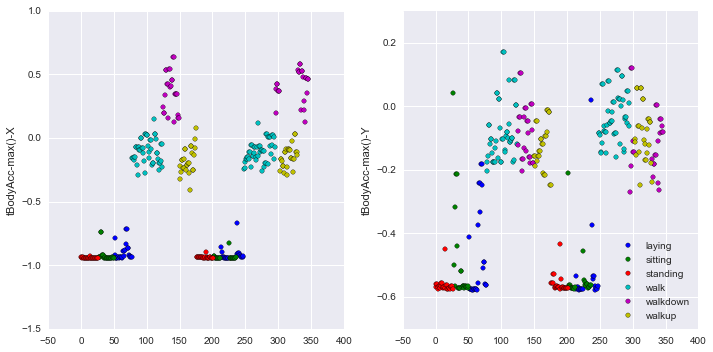

In [79]:
f, (ax1, ax2) = plt.subplots(ncols=2)
f.set_size_inches(10, 5)

for act, df in numericActivity:
    ax1.scatter(df.index, df.ix[:,9], c=cols[act], label=act)
    ax2.scatter(df.index, df.ix[:,10], c=cols[act], label=act)
    
ax1.set_ylabel(sdata.columns[9])
ax2.set_ylabel(sdata.columns[10])
ax2.legend(loc='lower right')

f.tight_layout();

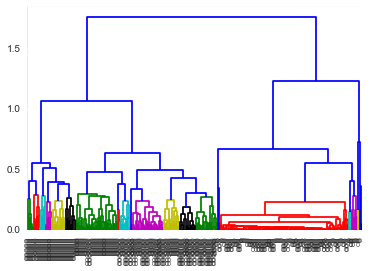

In [94]:
distanceMatrix1 = pdist(subj1.ix[:, 9:12])
R2 = dendrogram(linkage(distanceMatrix1, method='complete'), color_threshold=0.3, 
                leaf_label_func=lambda x: 'O' * (actlabels.labels[x] + 1),
                leaf_font_size=6)



In [95]:
# a simple scale function to normalize a matrix
def scale(matrix):
    from numpy import mean, std
    return (matrix - mean(matrix, axis=0)) / std(matrix, axis=0)


In [96]:
U, D, Vt = np.linalg.svd(subj1.ix[:,:-2].apply(scale), full_matrices=False)

NameError: name 'samsungData' is not defined

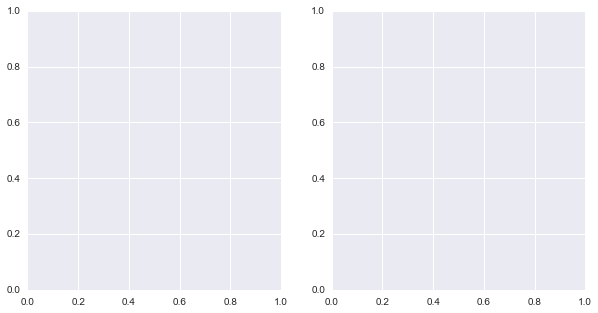

In [98]:
f, (ax1, ax2) = plt.subplots(ncols=2)
f.set_size_inches(10, 5)
subj1 = sdata[sdata['subject'] == 1]

for lb, cl in zip(list(actlabels.levels), 'b g r c m y k'.split()):
    idx = subj1['activity'] == lb
    ax1.scatter(subj1.index[idx], U[idx,0], c=cl, label=lb)
    ax2.scatter(subj1.index[idx], U[idx,1], c=cl, label=lb)
    
ax1.set_ylabel('U[:,0]')
ax2.set_ylabel('U[:,1]')
ax2.legend(loc='lower right')

f.tight_layout();

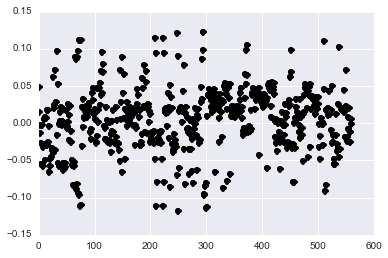

In [100]:
plt.plot(Vt[1,:], 'ok');

In [101]:
maxContrib = np.argmax(Vt[1,:])
maxContrib

295

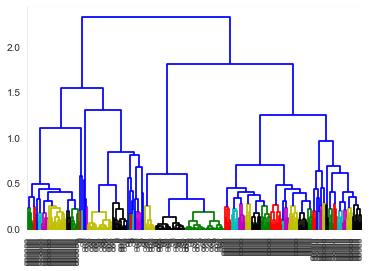

In [103]:
distanceMatrix = pdist(subj1.take(range(9,12) + [maxContrib], axis=1))
R3 = dendrogram(linkage(distanceMatrix, method='complete'), 
           color_threshold=0.3, 
           leaf_label_func=lambda x: 'O' * (actlabels.labels[x] + 1),
           leaf_font_size=6)

### K Means

In [104]:

from scipy.cluster.vq import kmeans, vq

data = np.matrix(subj1.ix[:,:-2])

centers, _ = kmeans(data, 6, iter=100)
cluster, _ = vq(data, centers)

df = pd.crosstab(cluster, subj1['activity'])
df

activity,laying,sitting,standing,walk,walkdown,walkup
row_0,,,,,,
0,27,0,0,0,0,0
1,18,13,3,0,0,0
2,0,0,0,95,0,0
3,5,0,0,0,0,53
4,0,0,0,0,49,0
5,0,34,50,0,0,0


To read the table, we look at the columns, which show the 'True' activities, 
and go down through the rows to see in which cluster centre(s) the activity is 
assigned by the K-means algorithm. We can see that WALK, WALKDOWN, and WALKUP are 
classified almost exclusively to one cluster. We don't see so many classification 
errors for STANDING as well. SITTING and LAYING, on the other hand, are not so easy 
to cluster. As we see there are quite some misclassifications for these activities.

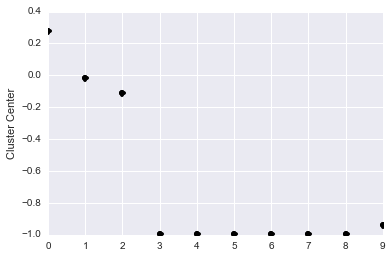

In [107]:
idmax = np.argmax(df['laying'])

plt.plot(centers[idmax,:10], 'ok')
plt.ylabel('Cluster Center');

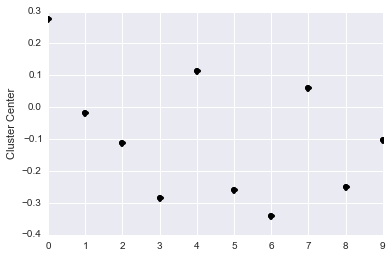

In [108]:
idmax = np.argmax(df['walk'])

plt.plot(centers[idmax,:10], 'ok')
plt.ylabel('Cluster Center');